# Gradient Descent Explained

This notebook explains the concept of gradient descent, a fundamental optimization algorithm used in machine learning and deep learning. We will cover the basics of gradient descent, visualize its working, and see how it applies to a simple function.

## What is Gradient Descent?

Gradient descent is an optimization algorithm used to minimize a function by iteratively moving towards the steepest descent direction. It is commonly used to update the parameters of a model in machine learning to minimize the cost function.

## Mathematical Foundation

In mathematical terms, the gradient of a function is a vector that points in the direction of the greatest rate of increase of the function. The gradient descent algorithm updates the parameters in the opposite direction of the gradient of the cost function with respect to the parameters.

/tmp/ipykernel_1220564/111794937.py:42: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  point.set_data(x_val, y_val)
/tmp/ipykernel_1220564/111794937.py:42: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  point.set_data(x_val, y_val)


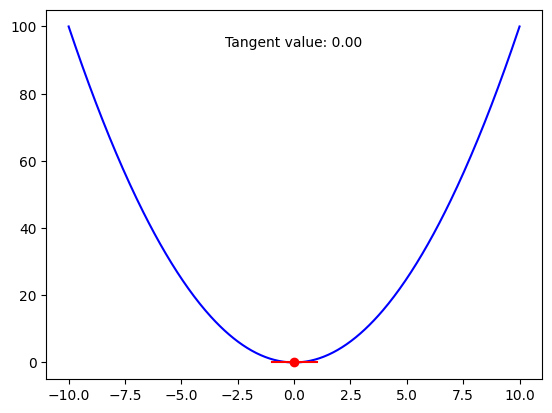

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Define the function and its gradient
def f(x):
    return x**2

def grad_f(x):
    return 2*x

# Gradient Descent Algorithm
def gradient_descent(starting_point, learning_rate, n_iterations):
    x = starting_point
    history = [x]
    for _ in range(n_iterations):
        x = x - learning_rate * grad_f(x)
        history.append(x)
    return np.array(history)

# Parameters
starting_point = 10
learning_rate = 0.1
n_iterations = 50

# Run Gradient Descent
history = gradient_descent(starting_point, learning_rate, n_iterations)

# Visualization
x = np.linspace(-10, 10, 400)
y = f(x)

fig, ax = plt.subplots()
ax.plot(x, y, 'b')
point, = ax.plot([], [], 'ro')
line, = ax.plot([], [], 'r-')
tangent_value_text = ax.text(0.5, 0.9, '', transform=ax.transAxes, ha='center')

def update(frame):
    x_val = history[frame]
    y_val = f(x_val)
    point.set_data(x_val, y_val)
    # Tangent line
    tangent_x = np.linspace(x_val - 1, x_val + 1, 100)
    tangent_y = grad_f(x_val) * (tangent_x - x_val) + y_val
    line.set_data(tangent_x, tangent_y)
    
    # Update tangent value text
    tangent_value_text.set_text(f'Tangent value: {grad_f(x_val):.2f}')
    
    return point, line, tangent_value_text

ani = FuncAnimation(fig, update, frames=len(history), interval=200, blit=True)

# Save the animation as a GIF
ani.save('gradient_descent_with_tangent.gif', writer='imagemagick')

/tmp/ipykernel_1220564/2767145756.py:6: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


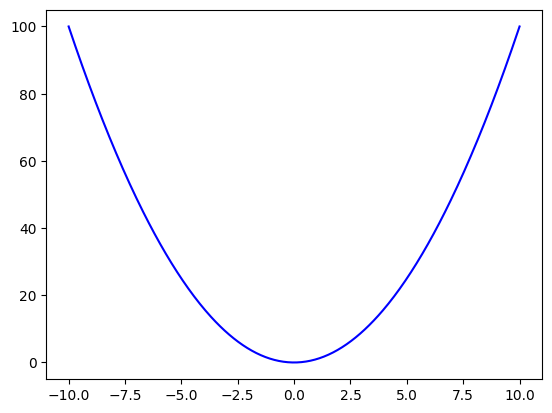

In [4]:

fig, ax = plt.subplots()
ax.plot(x, y, 'b')
point, = ax.plot([], [], 'ro')
line, = ax.plot([], [], 'r-')
tangent_value_text = ax.text(0.5, 0.9, '', transform=ax.transAxes, ha='center')
fig.show()

In the above code, we defined a simple quadratic function \(f(x) = x^2\) and its gradient. We then implemented the gradient descent algorithm and visualized its optimization process with tangent lines at each step.

## Visualization of Gradient Descent with Tangent Lines

The following animation shows the gradient descent process with tangent lines: 

![Gradient Descent with Tangent Lines Animation](gradient_descent_with_tangent.gif)

## Backward Pass

The **"backward pass"** refers to the process of computing gradients of a loss function with respect to the model's parameters in a neural network during the training phase. Here’s a detailed explanation:

- Neural Network Training Overview
Neural networks are trained using a technique called backpropagation, which consists of two main phases:

- Forward Pass: During the forward pass, input data is propagated through the network layer by layer, resulting in an output prediction.

- Backward Pass: In the backward pass (or backpropagation), the gradients of the loss function with respect to each parameter in the network are computed. These gradients indicate how much and in what direction each parameter should be adjusted to minimize the error (loss) of the network's predictions.


### Steps in the Backward Pass:

- Loss Computation: First, the loss function (e.g., mean squared error, cross-entropy) is computed using the predicted output and the actual target values.

- Gradient Calculation: After computing the loss, gradients of the loss with respect to each parameter (weights and biases) in the network are computed using the chain rule of calculus. Gradients quantify the sensitivity of the loss function to changes in each parameter. A higher gradient magnitude indicates a larger impact on the loss when the parameter changes.

- Parameter Update: Once the gradients are computed, the network parameters are updated using an optimization algorithm (e.g., gradient descent, Adam optimizer). The direction and magnitude of the parameter update are determined by the gradients and the chosen optimization method.

### Importance of the Backward Pass:

- Training Efficiency: Efficient computation of gradients allows neural networks to learn from data effectively. Gradients guide the optimization process, helping the network converge towards a state where it makes accurate predictions.

- Automatic Differentiation: Backpropagation automates the calculation of gradients through the network, which is crucial given the complexity of modern neural networks with many layers and parameters.

- Parameter Tuning: By adjusting parameters based on gradients, neural networks continuously improve their ability to generalize from training data to unseen data.

# Gradient Blue Print

### Now lets undrstand the Gradient using GradientBluePrint

### Example 1

In [17]:
x1 = Variable(2., label = 'x1') # Node x1 
x2 = Variable(3., label = 'x2') # Node x2
w1 = Variable(-3., label = 'w1') # weight w1
w2 = Variable(1., label = 'w2') # weight w2
b = Variable(6.8813, label = 'b') # bias b

x1w1 = x1*w1 # Node x1w1
x1w1.label = 'x1*w1' # Label for node x1w1

x2w2 = x2*w2  # Node x2w2
x2w2.label = 'x2*w2' # Label for node x2w2

x1w1x2w2 = x1w1 + x2w2 # Node x1w1x2w2
x1w1x2w2.label = 'x1w1 + x2w2'  # Label for node x1w1x2w2 

n = x1w1x2w2 + b # Node n
n.label = 'n' # Label for node n

### Steps Explained:

1 - **Variable Initialization:**

Each Node (x1, x2) and Variable (w1, w2, b) is initialized as an instance of the Variable class with a specific numerical value (data) and a label for identification.

2- **Operations:**

    - Multiplications (x1w1 and x2w2):

        Node x1w1 = x1 * w1: Multiplies x1 with w1. This operation internally creates a new Variable instance representing the product x1 * w1.
        
        Node x2w2 = x2 * w2: Multiplies x2 with w2. Similarly, this operation computes x2 * w2 using the Variable class's multiplication operation.

    - Addition (x1w1x2w2):

    Node x1w1x2w2 = x1w1 + x2w2: Adds the results of x1 * w1 and x2 * w2. This step forms an intermediate variable x1w1x2w2 that represents the sum of these two products.

    - Final Addition with Bias (n):

        Node n = x1w1x2w2 + b: Adds x1w1x2w2 to b, resulting in the final output n.

3- **Gradient Initialization:**

    In the Variable class, the grad attribute is initialized to **Zero (0)** for each Node and variable (x1, x2, w1, w2, b). This is essential for automatic differentiation.

4- **Automatic Differentiation:**

- **Forward Pass:**
    During the forward pass, variables undergo operations (* and +), and intermediate results (x1w1, x2w2, x1w1x2w2, n) are computed.

- **Backward Pass (backward() Method):**
  
        - After computing the final output (n), gradients with respect to each variable are computed using the chain rule of differentiation.
  
        - Each variable's grad attribute accumulates the gradient contributions from its dependent variables during the backward pass.
  
        - For instance, n.grad starts with 1.0 (since it's the output variable), and gradients propagate backward through x1w1x2w2, x1w1, x2w2, and finally to x1, w1, x2, w2, and b.


5- **Node Relationship:**

    - Parent Node (n): n represents the final output node in this computational graph.
    
    - Child Node (x1w1x2w2 + b): x1w1x2w2 + b is derived directly from x1w1x2w2 and b, making it a child node of n.
    
    - Dependencies (x1, x2, w1, w2, b): x1, x2, w1, w2, and b are all dependencies for calculating n, and thus they are child nodes of n in the computational graph.

### Explanation of Gradients:

The gradients represent how each variable affects the final output n. 

For example, x1.grad, w1.grad, x2.grad, w2.grad, and b.grad will contain the computed gradients after calling n.backward().

- **Importance of Setting Gradients to 0**
  
By initializing grad to 0 for each Variable instance (x1, x2, w1, w2, b), you ensure that:

    Clean State: Each variable starts with a clean state for gradient accumulation during the backward pass.
    
    Accurate Differentiation: This approach enables accurate computation of gradients using the chain rule, facilitating efficient optimization algorithms like gradient descent in machine learning.

In GradientBluePrint we show n as a graph of connected nodes, node n is:

In [18]:
n

Variable(data=3.8813000000000004)|Child nodes(nodes={Variable(data=-3.0)|Child nodes(nodes={Variable(data=3.0)|Child nodes(nodes={Variable(data=3.0)|Child nodes(nodes=set()|Label(label=x2)), Variable(data=1.0)|Child nodes(nodes=set()|Label(label=w2))}|Label(label=x2*w2)), Variable(data=-6.0)|Child nodes(nodes={Variable(data=-3.0)|Child nodes(nodes=set()|Label(label=w1)), Variable(data=2.0)|Child nodes(nodes=set()|Label(label=x1))}|Label(label=x1*w1))}|Label(label=x1w1 + x2w2)), Variable(data=6.8813)|Child nodes(nodes=set()|Label(label=b))}|Label(label=n))

### Visual Explaination of Node n

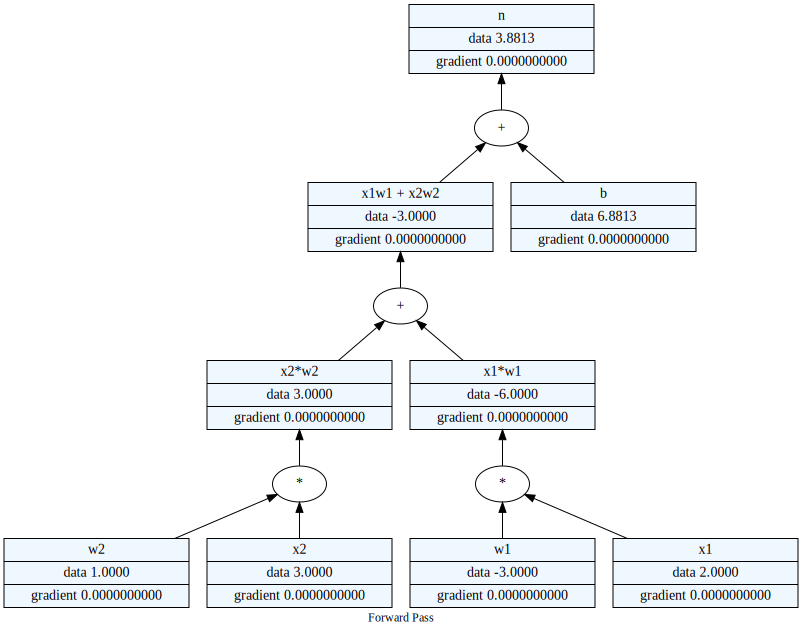

In [19]:
n.__draw__()

### Backward Pass on Node n:

Backward pass on node n will calculate the gradient of each child node on n which shows how the change in each node will implace the value of Node n

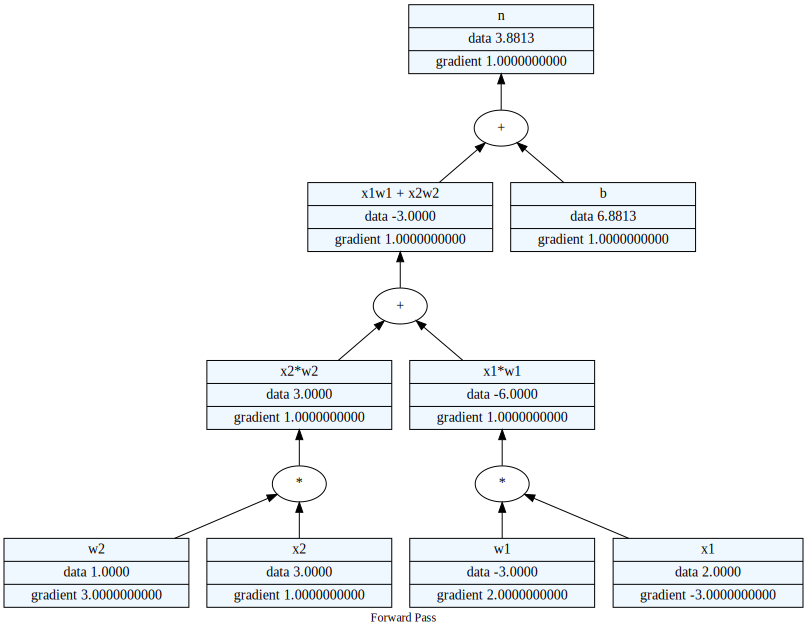

In [20]:
n.backward()
n.__draw__()